Image 'image.jpg' loaded successfully.
Image type: <class 'numpy.ndarray'>
Image shape: (1060, 1885, 3)

Mean Filter
MSE : 0.0027469857954468668
PSNR: 25.61143586292941
SSIM: 0.6215993395189369

Median Filter
MSE : 0.0025001038876205773
PSNR: 26.020419445747848
SSIM: 0.6437978669803768

Max Filter
MSE : 0.005459600499751966
PSNR: 22.628391351525792
SSIM: 0.5288650392788492

Adaptive Wiener
MSE : 0.002468694338243191
PSNR: 26.075326789753298
SSIM: 0.6284553528848446

Inverse Filter
MSE : 0.01967471620099014
PSNR: 17.06091523428002
SSIM: 0.1934245237796346

Wiener Filter
MSE : 0.01626312130960324
PSNR: 17.88796098505505
SSIM: 0.36916665295148204


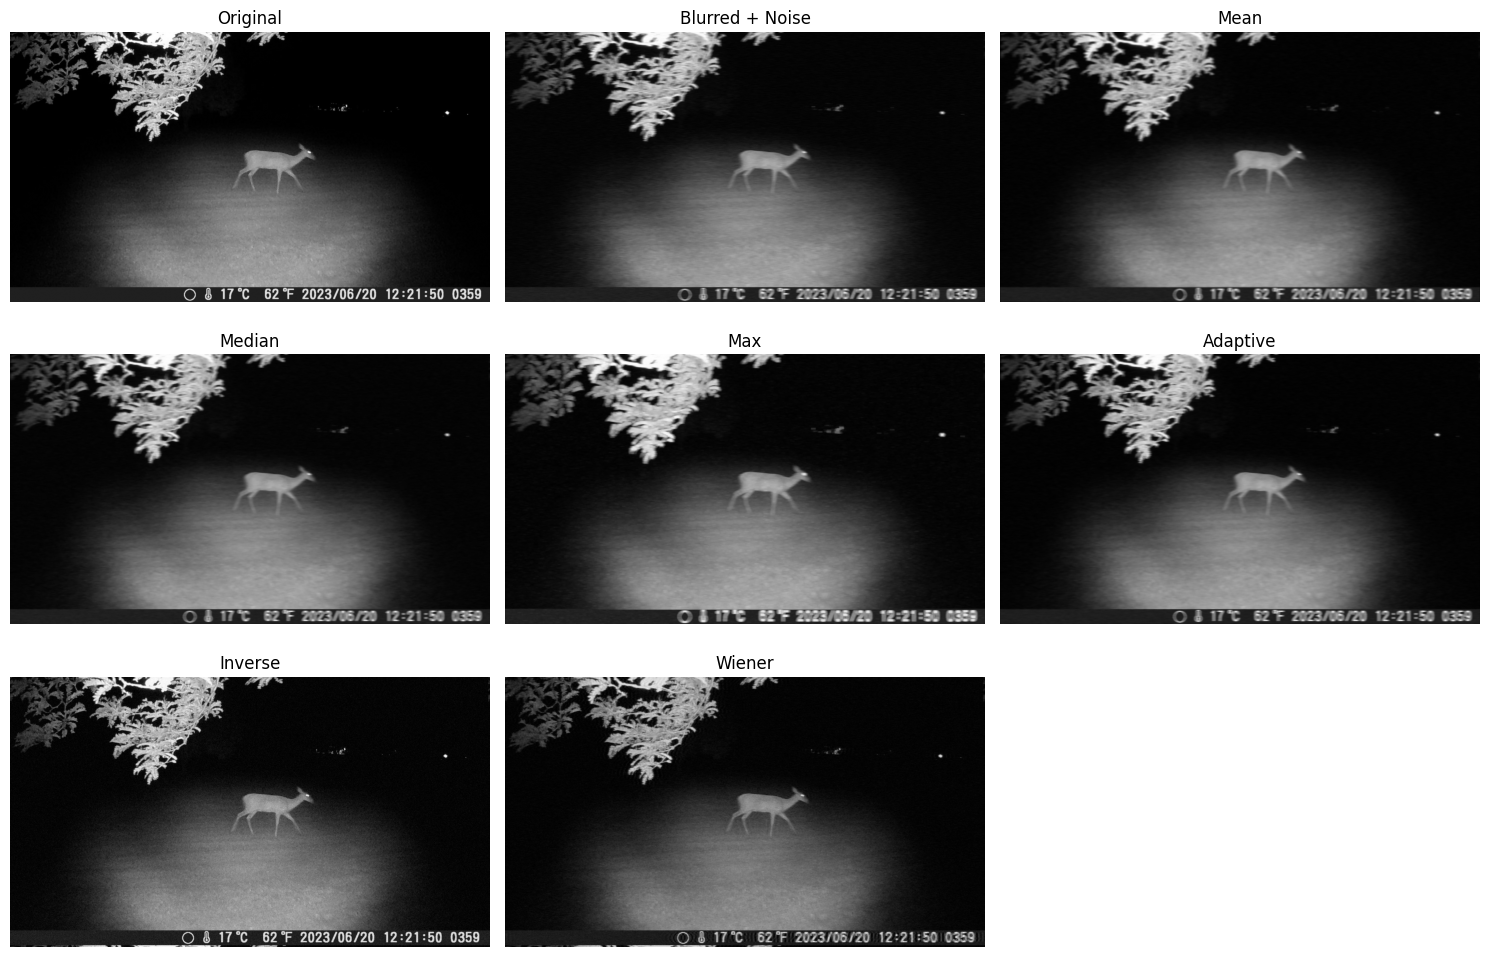

In [ ]:
# ================================
# IMAGE RESTORATION PBL - COLAB
# ================================

import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from scipy.signal import wiener
from skimage.metrics import peak_signal_noise_ratio as PSNR
from skimage.metrics import mean_squared_error as MSE
from skimage.metrics import structural_similarity as SSIM
from numpy.fft import fft2, ifft2, fftshift
import os

image_filename ='image.jpg'
image_path = os.path.join('/content/', image_filename)

img = cv2.imread(image_path)

print(f"Image '{image_filename}' loaded successfully.")
print("Image type:", type(img))
print("Image shape:", img.shape)

# Convert to grayscale first for 2D convolution operations
# Use img_rgb (which is uint8) for cvtColor, and then normalize
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = img_gray / 255.0   # Normalize

# ----------------------------------
# 2. Simulate Degradations
# ----------------------------------

# Add Gaussian Noise
noise = np.random.normal(0, 0.05, img.shape)
noisy_img = img + noise
noisy_img = np.clip(noisy_img, 0, 1)

# Motion Blur Kernel
def motion_kernel(size=15):
    kernel = np.zeros((size, size))
    kernel[int((size-1)/2), :] = np.ones(size)
    kernel = kernel / size
    return kernel

kernel = motion_kernel(15)

# Apply motion blur
blurred_img = convolve2d(noisy_img, kernel, mode='same', boundary='wrap')

# ----------------------------------
# 3. Restoration Techniques
# ----------------------------------

# Mean Filter
mean_kernel = np.ones((5,5)) / 25
mean_filtered = convolve2d(blurred_img, mean_kernel, mode='same')

# Median Filter
median_filtered = cv2.medianBlur((blurred_img*255).astype(np.uint8), 5) / 255.0

# Max Filter (Morphological Dilation)
max_filtered = cv2.dilate((blurred_img*255).astype(np.uint8), np.ones((5,5))) / 255.0

# Adaptive Wiener Filter (local)
adaptive_filtered = wiener(blurred_img, (5,5))

# ----------------------------------
# 4. Frequency Domain Restoration
# ----------------------------------

# Inverse Filter
H = fft2(kernel, s=img.shape)
G = fft2(blurred_img)
H[np.abs(H) < 1e-3] = 1e-3  # Avoid division by zero
F_inverse = G / H
inverse_restored = np.abs(ifft2(F_inverse))

# Wiener Filter (Frequency Domain)
K = 0.01
F_wiener = (np.conj(H) / (np.abs(H)**2 + K)) * G
wiener_restored = np.abs(ifft2(F_wiener))

# ----------------------------------
# 5. Evaluation Metrics
# ----------------------------------

def evaluate(original, restored, name):
    print(f"\n{name}")
    print("MSE :", MSE(original, restored))
    print("PSNR:", PSNR(original, restored))
    print("SSIM:", SSIM(original, restored, data_range=1.0))

evaluate(img, mean_filtered, "Mean Filter")
evaluate(img, median_filtered, "Median Filter")
evaluate(img, max_filtered, "Max Filter")
evaluate(img, adaptive_filtered, "Adaptive Wiener")
evaluate(img, inverse_restored, "Inverse Filter")
evaluate(img, wiener_restored, "Wiener Filter")

# ----------------------------------
# 6. Display Results
# ----------------------------------

titles = ["Original", "Blurred + Noise",
          "Mean", "Median", "Max",
          "Adaptive", "Inverse", "Wiener"]

images = [img, blurred_img,
          mean_filtered, median_filtered, max_filtered,
          adaptive_filtered, inverse_restored, wiener_restored]

plt.figure(figsize=(15,10))
for i in range(len(images)):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

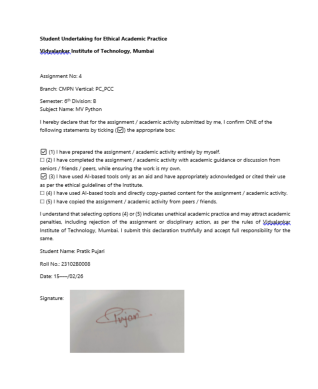

In [ ]:
image_filename ='ss.png'
image_path = os.path.join('/content/', image_filename)

img = cv2.imread(image_path)

plt.imshow(img)
plt.axis('off')
plt.show()